In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense,Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, precision_recall_curve, confusion_matrix, roc_curve, auc, roc_auc_score

In [4]:
dataset = pd.read_csv("ultimateData.csv")
dataset.set_index('label')

,thiG,siaM,imuB,pbpC,dhbE,anmK,irtA,group_2298,yvoA_3,group_2552,...,YP_003358396.1,YP_003358397.1,YP_002455933.1,YP_002455973.1,YP_002456003.1,YP_002456020.1,YP_003358384.1,YP_003358386.1,YP_003358385.1,value
label,,,,,,,,,,,,,,,,,,,,,
PSA-BAB-IMI-102140_14-1,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
PSA-BAB-IMI-102140_lbl3,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,1
PSA-BAB-IMI-102140_lkd16,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
PSA-BAB-IMI-102140_lma1,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,1
PSA-BAB-IMI-102140_luz19,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
PSA-BAB-IMI-102140_luz24,3,3,3,3,2,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
PSA-BAB-IMI-102140_luz7,3,3,3,3,2,2,2,2,2,1,...,1,1,0,0,0,0,1,1,1,0
PSA-BAB-IMI-102140_pb1,3,3,3,3,2,2,2,2,2,1,...,0,0,1,1,1,1,0,0,0,1
PSA-BAB-IMI-102141_14-1,3,3,3,3,2,2,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
labels = dataset['value'].values
features = dataset.drop('value', axis=1).values

In [6]:
#standardizing the input feature

sc = StandardScaler()
X = sc.fit_transform(features[:,1:])

/home/wojtek/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/wojtek/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=42)

In [42]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=40337))

#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [43]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [44]:
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
2181/2181 [==============================] - 1s 245us/step - loss: 0.6083 - acc: 0.7029
Epoch 2/100
2181/2181 [==============================] - 1s 250us/step - loss: 0.5161 - acc: 0.7043
Epoch 3/100
2181/2181 [==============================] - 1s 250us/step - loss: 0.4789 - acc: 0.7043
Epoch 4/100
2181/2181 [==============================] - 1s 245us/step - loss: 0.4472 - acc: 0.7873
Epoch 5/100
2181/2181 [==============================] - 1s 252us/step - loss: 0.4276 - acc: 0.8038
Epoch 6/100
2181/2181 [==============================] - 1s 250us/step - loss: 0.4059 - acc: 0.8166
Epoch 7/100
2181/2181 [==============================] - 1s 262us/step - loss: 0.3912 - acc: 0.8276
Epoch 8/100
2181/2181 [==============================] - 1s 251us/step - loss: 0.3771 - acc: 0.8391
Epoch 9/100
2181/2181 [==============================] - 1s 246us/step - loss: 0.3686 - acc: 0.8492
Epoch 10/100
2181/2181 [==============================] - 1s 246us/step - loss: 0.3450 - acc: 0.8487

In [45]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

2181/2181 [==============================] - 0s 165us/step


[0.2733583649648597, 0.9284731774415406]

In [46]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [47]:
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [48]:

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[663  82]
 [151 179]]


In [64]:

F1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [51]:
print([F1, accuracy, precision, recall])

[0.6057529610829103, 0.7832558139534884, 0.685823754789272, 0.5424242424242425]


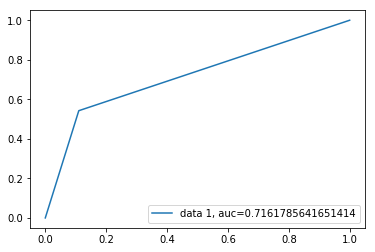

Apply gridsearch to find optimal parameters of the network

In [21]:
def build_classifier(optimizer, units1, units2, units3):
    classifier = Sequential()
    #First Hidden Layer
    classifier.add(Dense(units=units1, activation='relu', kernel_initializer='random_normal', input_dim=40337))

    #Second  Hidden Layer
    classifier.add(Dense(units=units2, activation='relu', kernel_initializer='random_normal'))
    
    classifier.add(Dense(units=units3, activation='relu', kernel_initializer='random_normal'))

    #Output Layer
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
    classifier.compile(optimizer=optimizer,loss='binary_crossentropy', metrics =['accuracy'])
    return classifier

In [22]:
classifier = KerasClassifier(build_fn=build_classifier)

In [23]:
from sklearn.model_selection import GridSearchCV
parameters ={'batch_size':[5,7,8,10],
            'nb_epoch':[30,40,50, 60,70,100],
            'optimizer':['adam','rmsprop','SGD'],
            'units1':[15,17,20,23,25,30, 50],
            'units2':[15,17,20,23,25,30, 50],
            'units3':[15,17,20,23,25,30, 50]}


In [24]:
gridSearch = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          cv=10,
                         n_jobs=-1,
                         return_train_score=True)

In [25]:
gridSearch.fit(X_train, y_train)

Epoch 1/1
1962/1962 [==============================] - 1s 257us/step
Epoch 1/1
1963/1963 [==============================] - 1s 255us/step
Epoch 1/1
1963/1963 [==============================] - 1s 264us/step
Epoch 1/1
1963/1963 [==============================] - 1s 305us/step
Epoch 1/1
1963/1963 [==============================] - 1s 284us/step
Epoch 1/1
1963/1963 [==============================] - 0s 248us/step
Epoch 1/1
1963/1963 [==============================] - 1s 280us/step
Epoch 1/1
1963/1963 [==============================] - 1s 281us/step
Epoch 1/1
1963/1963 [==============================] - 1s 291us/step
Epoch 1/1
1963/1963 [==============================] - 1s 318us/step
Epoch 1/1
1962/1962 [==============================] - 1s 306us/step
Epoch 1/1
1963/1963 [==============================] - 1s 305us/step
Epoch 1/1
1963/1963 [==============================] - 1s 283us/step
Epoch 1/1
1963/1963 [==============================] - 1s 326us/step
Epoch 1/1
1963/1963 [=============

1963/1963 [==============================] - 1s 643us/step
Epoch 1/1
1963/1963 [==============================] - 1s 626us/step
Epoch 1/1
1963/1963 [==============================] - 1s 664us/step
Epoch 1/1
1962/1962 [==============================] - 1s 641us/step
Epoch 1/1
1963/1963 [==============================] - 1s 668us/step
Epoch 1/1
1963/1963 [==============================] - 1s 676us/step
Epoch 1/1
1963/1963 [==============================] - 1s 645us/step
Epoch 1/1
1963/1963 [==============================] - 1s 696us/step
Epoch 1/1
1963/1963 [==============================] - 1s 697us/step
Epoch 1/1
1963/1963 [==============================] - 1s 707us/step
Epoch 1/1
1963/1963 [==============================] - 1s 682us/step
Epoch 1/1
1963/1963 [==============================] - 1s 712us/step
Epoch 1/1
1963/1963 [==============================] - 1s 691us/step
Epoch 1/1
1962/1962 [==============================] - 1s 699us/step
Epoch 1/1
1963/1963 [=======================

1963/1963 [==============================] - 2s 1ms/step
Epoch 1/1
1963/1963 [==============================] - 2s 1ms/step
Epoch 1/1
1963/1963 [==============================] - 2s 1ms/step
Epoch 1/1
1963/1963 [==============================] - 2s 1ms/step
Epoch 1/1
1963/1963 [==============================] - 2s 1ms/step
Epoch 1/1
1962/1962 [==============================] - 2s 1ms/step
Epoch 1/1
1963/1963 [==============================] - 2s 1ms/step
Epoch 1/1
1963/1963 [==============================] - 2s 1ms/step
Epoch 1/1
1963/1963 [==============================] - 2s 1ms/step
Epoch 1/1
1963/1963 [==============================] - 2s 1ms/step
Epoch 1/1
1963/1963 [==============================] - 2s 1ms/step
Epoch 1/1
1963/1963 [==============================] - 2s 1ms/step
Epoch 1/1
1963/1963 [==============================] - 2s 1ms/step
Epoch 1/1
1963/1963 [==============================] - 2s 1ms/step
Epoch 1/1
1963/1963 [==============================] - 2s 1ms/step
Epoch

1963/1963 [==============================] - 3s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 3s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 3s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 3s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 3s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 3s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 3s 2ms/step
Epoch 1/1
1962/1962 [==============================] - 3s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 3s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 3s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 3s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 3s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 3s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 3s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 4s 2ms/step
Epoch

1962/1962 [==============================] - 4s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 4s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 4s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 4s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 4s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 4s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 4s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 4s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 4s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 4s 2ms/step
Epoch 1/1
1962/1962 [==============================] - 4s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 5s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 5s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 5s 2ms/step
Epoch 1/1
1963/1963 [==============================] - 5s 2ms/step
Epoch

1963/1963 [==============================] - 5s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 5s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 5s 3ms/step
Epoch 1/1
1962/1962 [==============================] - 5s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 5s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 5s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 5s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 6s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 6s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 6s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 6s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 6s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 6s 3ms/step
Epoch 1/1
1962/1962 [==============================] - 6s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 6s 3ms/step
Epoch

1963/1963 [==============================] - 7s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 7s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 7s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 7s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 7s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 7s 3ms/step
Epoch 1/1
1962/1962 [==============================] - 7s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 7s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 7s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 7s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 7s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 7s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 7s 3ms/step
Epoch 1/1
1963/1963 [==============================] - 7s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 7s 3ms/step
Epoch

1963/1963 [==============================] - 8s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 8s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 8s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 8s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 8s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 8s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 8s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 8s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 8s 4ms/step
Epoch 1/1
1962/1962 [==============================] - 8s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 8s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 8s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 8s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 8s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 8s 4ms/step
Epoch

1963/1963 [==============================] - 9s 5ms/step
Epoch 1/1
1963/1963 [==============================] - 9s 5ms/step
Epoch 1/1
1962/1962 [==============================] - 9s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 9s 5ms/step
Epoch 1/1
1963/1963 [==============================] - 9s 4ms/step
Epoch 1/1
1963/1963 [==============================] - 9s 5ms/step
Epoch 1/1
1963/1963 [==============================] - 9s 5ms/step
Epoch 1/1
1963/1963 [==============================] - 9s 5ms/step
Epoch 1/1
1963/1963 [==============================] - 9s 5ms/step
Epoch 1/1
1963/1963 [==============================] - 9s 5ms/step
Epoch 1/1
1963/1963 [==============================] - 9s 5ms/step
Epoch 1/1
1963/1963 [==============================] - 9s 5ms/step
Epoch 1/1
1962/1962 [==============================] - 9s 5ms/step
Epoch 1/1
1963/1963 [==============================] - 9s 5ms/step
Epoch 1/1
1963/1963 [==============================] - 9s 5ms/step
Epoch

KeyboardInterrupt: 

In [13]:
print(gridSearch.best_params_)

{'batch_size': 8, 'nb_epoch': 30, 'optimizer': 'rmsprop', 'units': 25}


In [14]:
    classifier = Sequential()
    #First Hidden Layer
    classifier.add(Dense(units=25, activation='relu', kernel_initializer='random_normal', input_dim=40337))

    #Second  Hidden Layer
    classifier.add(Dense(units=25, activation='relu', kernel_initializer='random_normal'))

    #Output Layer
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
    classifier.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics =['accuracy'])

In [15]:
classifier.fit(X_train,y_train, batch_size=8, epochs=30)

Epoch 1/30
2181/2181 [==============================] - 2s 1ms/step - loss: 0.5796 - acc: 0.7231
Epoch 2/30
2181/2181 [==============================] - 2s 1ms/step - loss: 0.5093 - acc: 0.7611
Epoch 3/30
2181/2181 [==============================] - 2s 1ms/step - loss: 0.4615 - acc: 0.7868
Epoch 4/30
2181/2181 [==============================] - 2s 936us/step - loss: 0.4309 - acc: 0.8106
Epoch 5/30
2181/2181 [==============================] - 2s 903us/step - loss: 0.4154 - acc: 0.8230
Epoch 6/30
2181/2181 [==============================] - 2s 991us/step - loss: 0.3976 - acc: 0.8322
Epoch 7/30
2181/2181 [==============================] - 2s 903us/step - loss: 0.3889 - acc: 0.8450
Epoch 8/30
2181/2181 [==============================] - 2s 936us/step - loss: 0.3718 - acc: 0.8496
Epoch 9/30
2181/2181 [==============================] - 2s 896us/step - loss: 0.3536 - acc: 0.8547
Epoch 10/30
2181/2181 [==============================] - 2s 909us/step - loss: 0.3438 - acc: 0.8629
Epoch 11/30
218

In [16]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

2181/2181 [==============================] - 0s 149us/step


[0.18305149202989582, 0.9211370930765704]

In [17]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [18]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[647  98]
 [128 202]]


In [19]:

F1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [20]:
print(F1, accuracy, precision, recall)

0.6412698412698412 0.7897674418604651 0.6733333333333333 0.6121212121212121
